#### Lab 8: Define and Solve an ML Problem of Your Choosing

In [13]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

############### GRADERS NOTE: I WORKED WITH ZERLYNE NANDWANI-SIMONS

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)# YOUR CODE HERE  BY THEODORA YAKOUB - ME!!!!!!!!!!!!!!!!

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

BY THEODORA YAKOUB - ME!

List the data set you have chosen.
We have selected the World Happiness Report 2018 data set. This file contains survey responses from roughly 150 countries reporting a Life Ladder score on a zero to ten scale alongside socioeconomic and emotional indicators such as GDP per capita, social support, health expectancy, freedom to make life choices, generosity and perceptions of corruption. Because every column is numeric and the table is modest in size we can focus on exploring feature relationships and model design without extensive text or date preprocessing.

What will you be predicting? What is the label?
We will predict the Life Ladder value which represents the average self reported happiness score for each country in each year. This continuous label allows us to quantify well-being on a numeric scale and to build regression models that map from measurable inputs such as income and health to overall happiness.


Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classification or multi-class classification problem?
This is a supervised learning problem in the regression category. Each row provides both the feature inputs and the continuous Life Ladder label. We will split the data into training and test sets and train models such as linear regression, decision trees or random forest regressors to learn the mapping from features to the happiness score. Since the target is numeric rather than categorical, clustering or classification methods do not apply. We will use cross validation to tune model parameters.


Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classification or multi-class classification problem?
This is a supervised learning problem in the regression category. Each row provides both the feature inputs and the continuous Life Ladder label. We will split the data into training and test sets and train models such as linear regression, decision trees or random forest regressors to learn the mapping from features to the happiness score. Since the target is numeric rather than categorical, clustering or classification methods do not apply. We will use cross validation to tune model parameters.
					
Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?	
Companies in the wellness sector could use these results to develop products or services that address people's needs. For instance, the marketing department could create highly tailored campaigns to appeal to consumers' desires for a better quality of life.





## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Number of Rows and Columns: (1562, 19)

Columns:
Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

Data Types:
country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support       

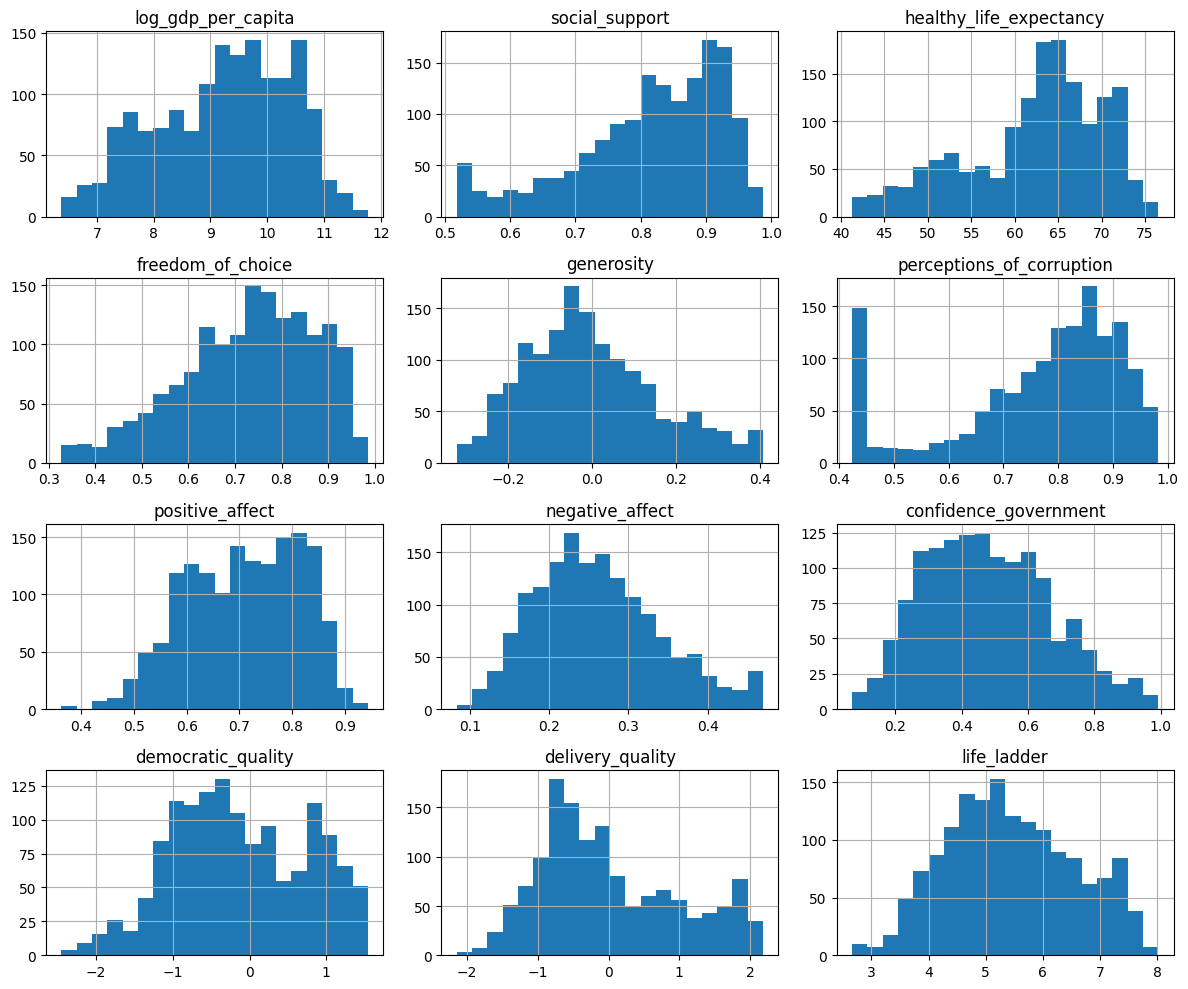

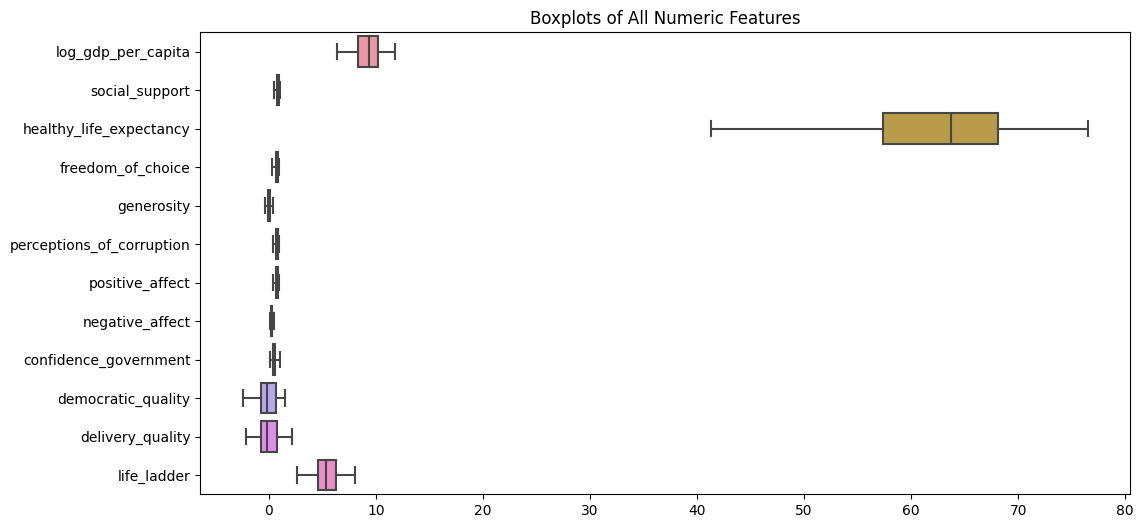

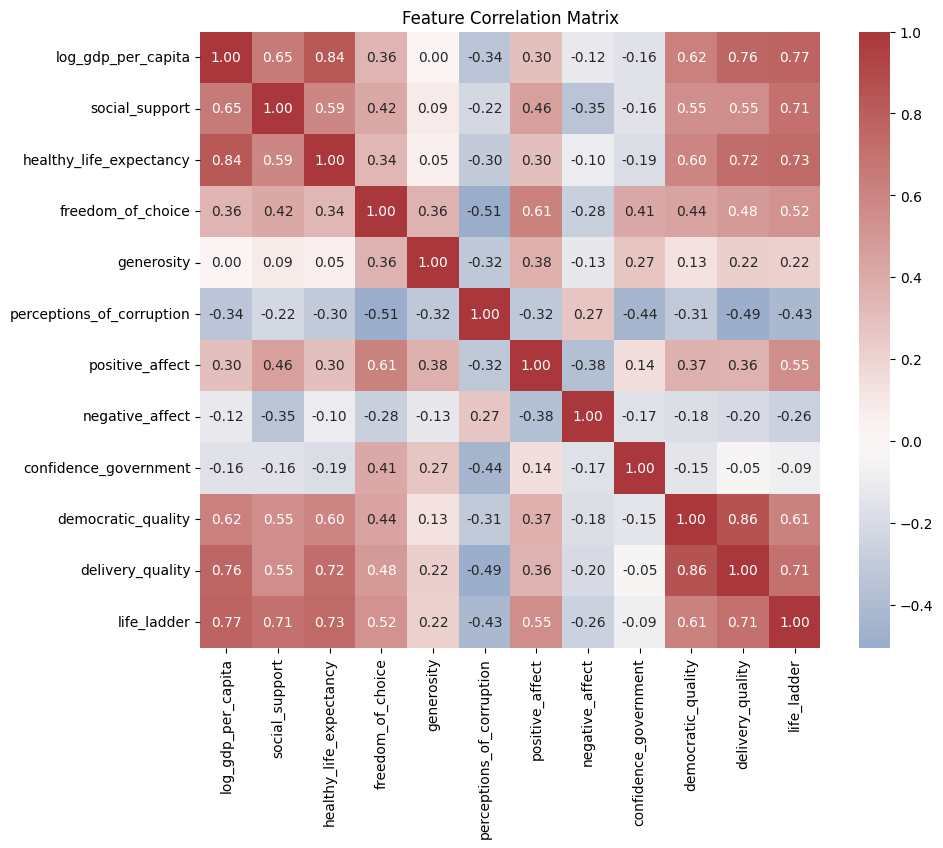

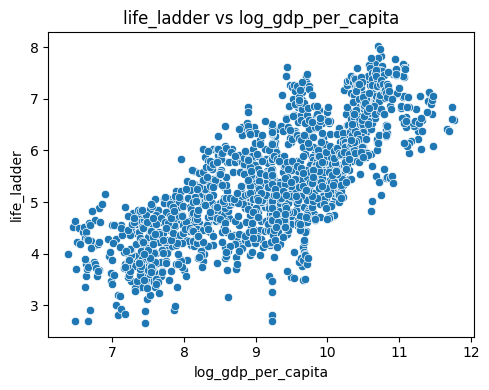

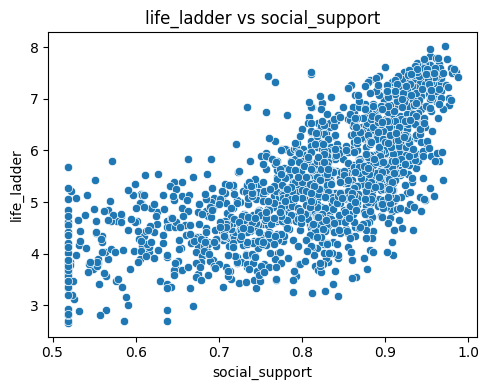

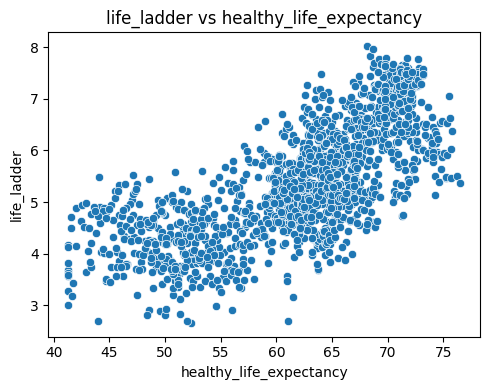

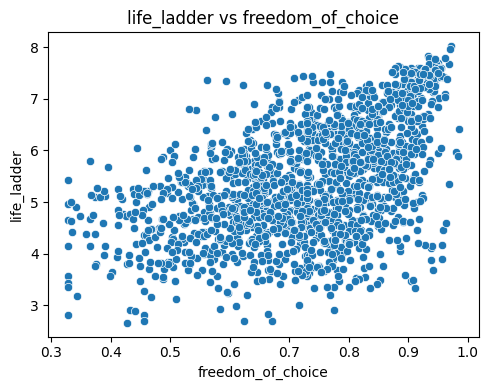

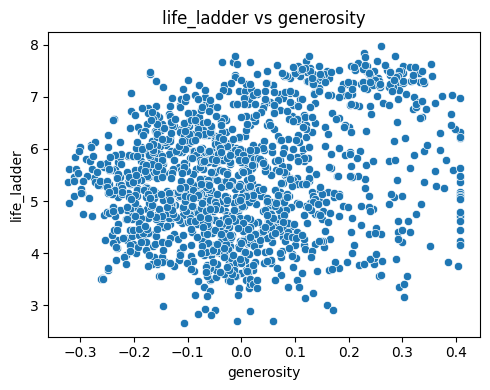

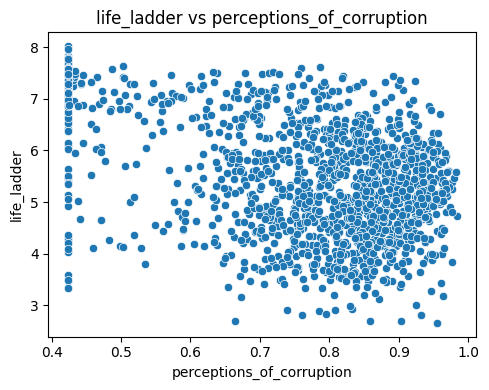

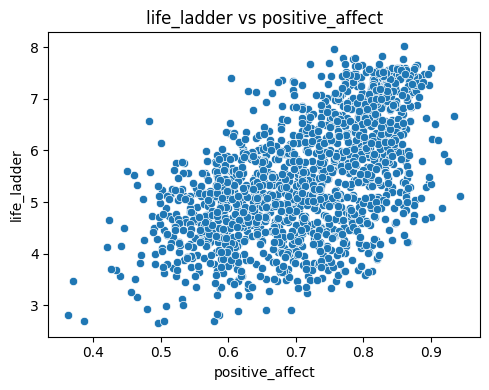

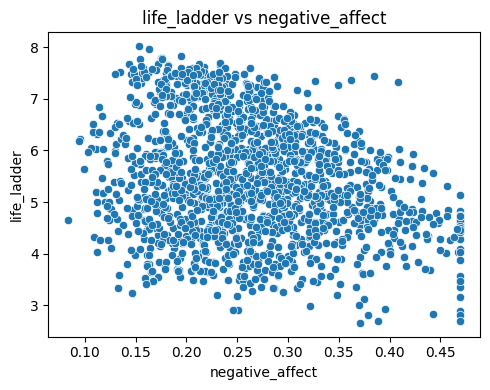

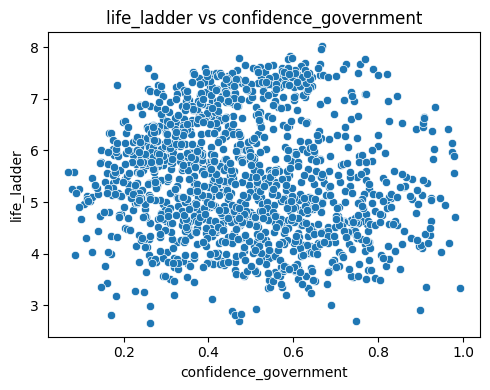

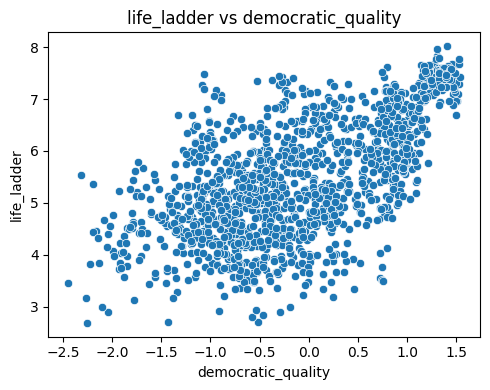

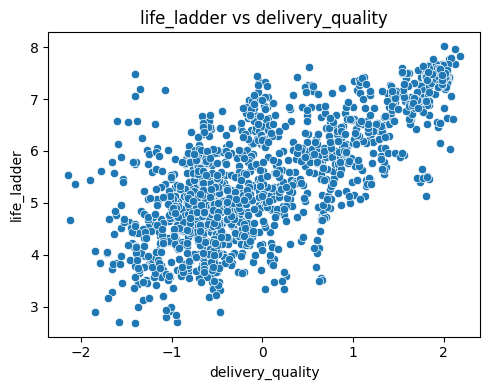

In [3]:
# This part is by Zerylene

shape = df.shape
print(f"Number of Rows and Columns: {shape}\n")

columns = df.columns
print(f"Columns:\n{columns}\n")

df.head(10)

In [14]:
# This part is by Zerylene
# check data types

data_types = df.dtypes
print(f"Data Types:\n{data_types}")

Data Types:
log_gdp_per_capita           float64
social_support               float64
healthy_life_expectancy      float64
freedom_of_choice            float64
generosity                   float64
perceptions_of_corruption    float64
positive_affect              float64
negative_affect              float64
confidence_government        float64
democratic_quality           float64
delivery_quality             float64
life_ladder                  float64
dtype: object


In [15]:
# This part is by Zerylene
# dropped columns with high amounts of missing

missing_vals = df.isnull().sum()
print(f"Number of Missing Values:\n{missing_vals}")

df.isnull().mean() * 100

Number of Missing Values:
log_gdp_per_capita           0
social_support               0
healthy_life_expectancy      0
freedom_of_choice            0
generosity                   0
perceptions_of_corruption    0
positive_affect              0
negative_affect              0
confidence_government        0
democratic_quality           0
delivery_quality             0
life_ladder                  0
dtype: int64


log_gdp_per_capita           0.0
social_support               0.0
healthy_life_expectancy      0.0
freedom_of_choice            0.0
generosity                   0.0
perceptions_of_corruption    0.0
positive_affect              0.0
negative_affect              0.0
confidence_government        0.0
democratic_quality           0.0
delivery_quality             0.0
life_ladder                  0.0
dtype: float64

In [6]:
# This part is by Zerylene
numeric_cols = df.select_dtypes(include = 'number').columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

missing_vals2 = df.isnull().sum()
print(f"Number of Missing Values:\n{missing_vals2}")

Number of Missing Values:
country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country

                            count       mean       std        min        25%  \
log_gdp_per_capita         1562.0   9.220822  1.173750   6.377396   8.330659   
social_support             1562.0   0.812451  0.113269   0.518340   0.749794   
healthy_life_expectancy    1562.0  62.260357  7.908351  41.265358  57.344959   
freedom_of_choice          1562.0   0.729176  0.143452   0.327507   0.635676   
generosity                 1562.0  -0.001937  0.153837  -0.322952  -0.108292   
perceptions_of_corruption  1562.0   0.766545  0.146488   0.444890   0.702761   
positive_affect            1562.0   0.708969  0.107021   0.362498   0.622581   
negative_affect            1562.0   0.261904  0.079593   0.083426   0.204680   
confidence_government      1562.0   0.480131  0.180415   0.068769   0.348685   
democratic_quality         1562.0  -0.126617  0.824041  -2.448228  -0.713479   
delivery_quality           1562.0   0.004947  0.925759  -2.144974  -0.671931   
life_ladder                1562.0   5.43

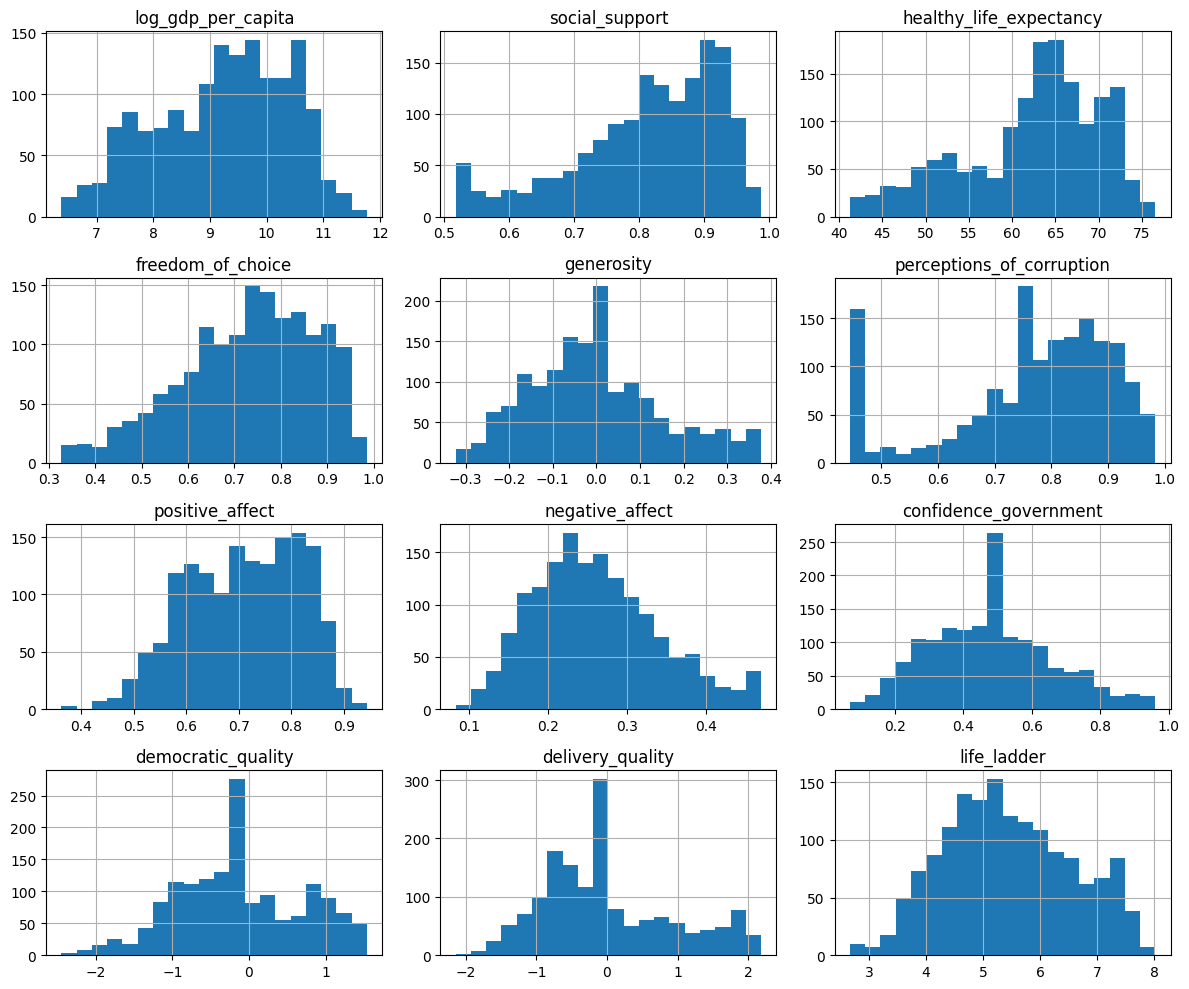

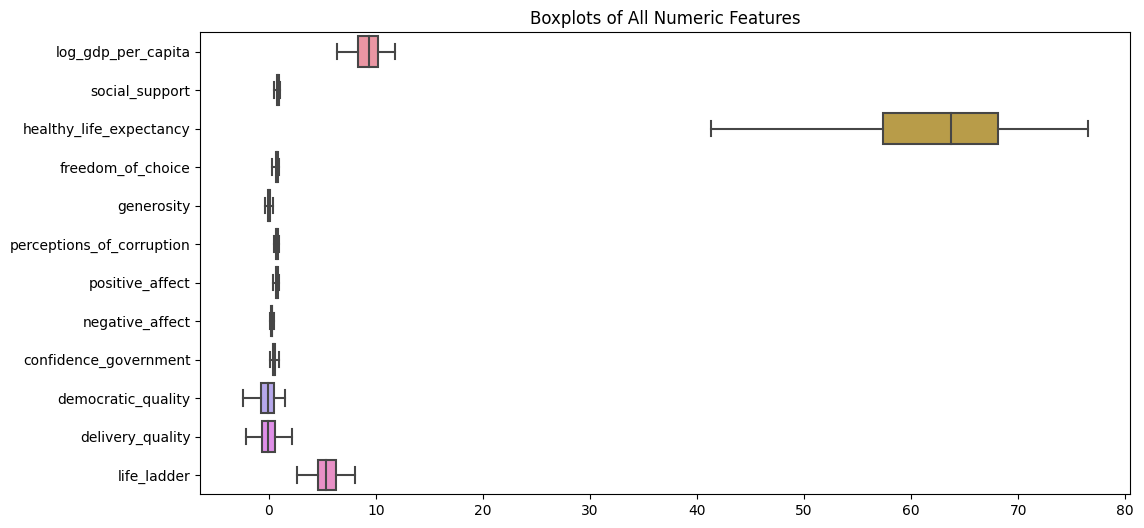

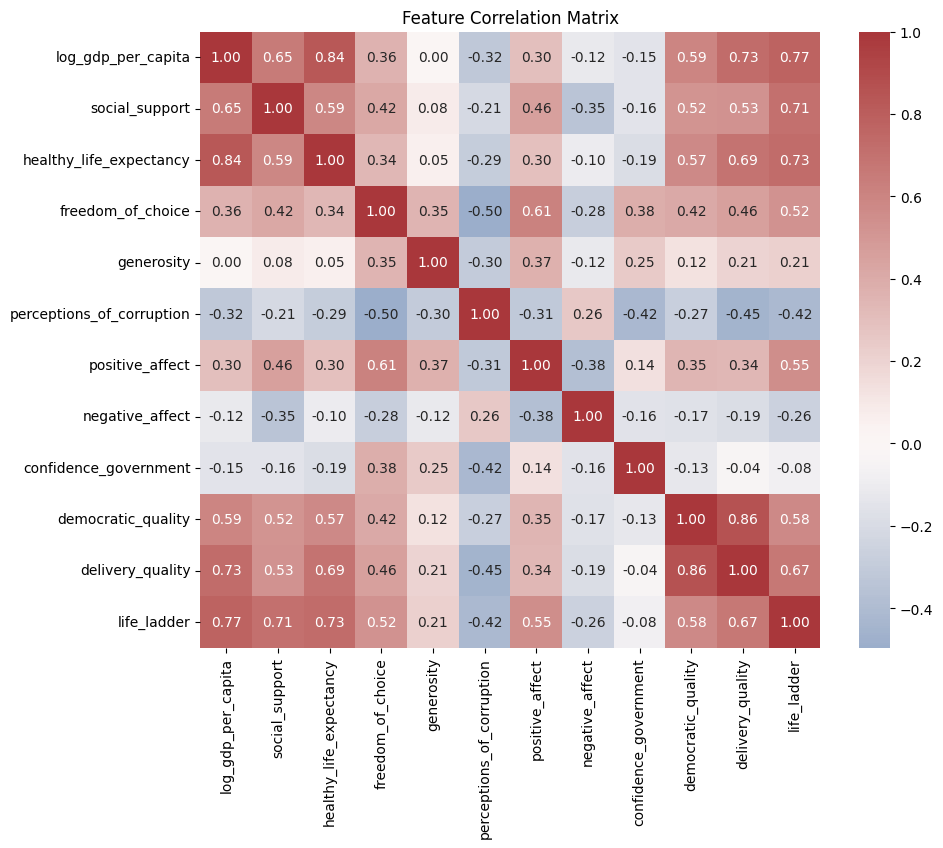

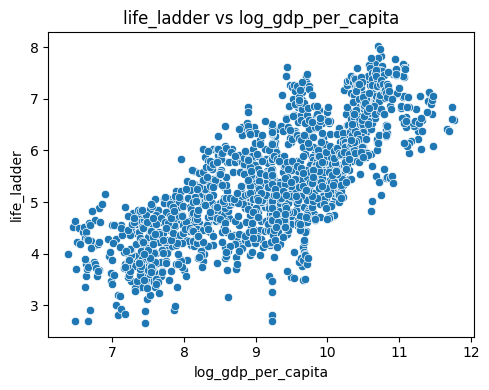

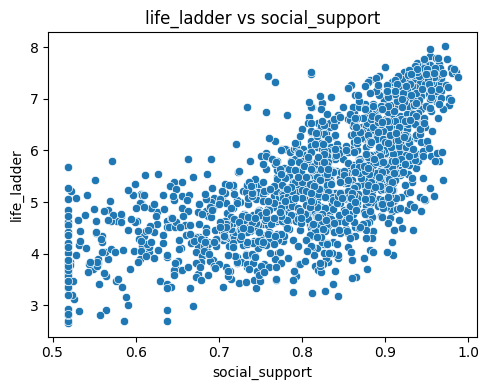

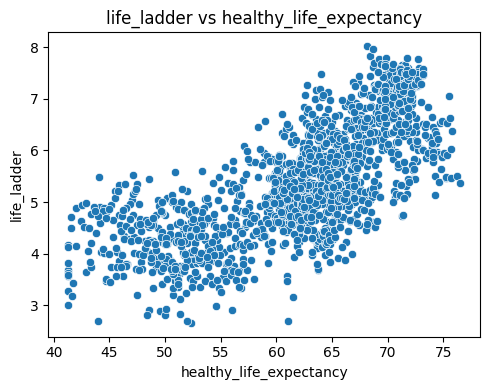

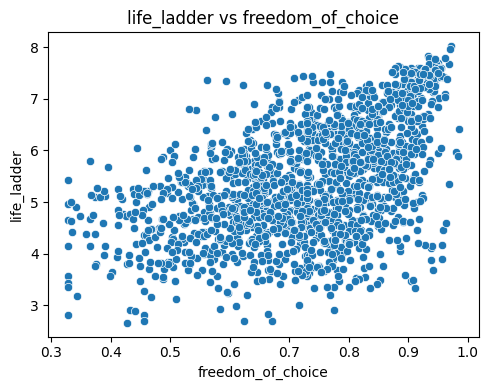

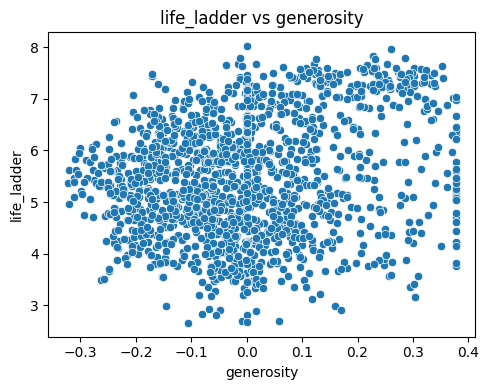

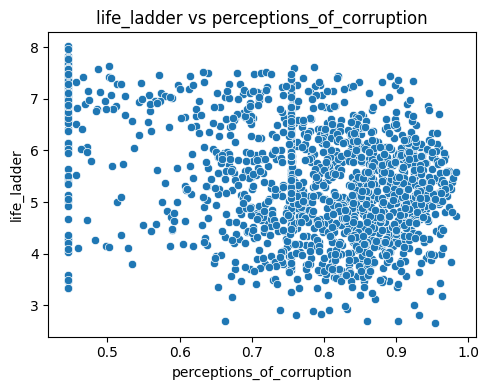

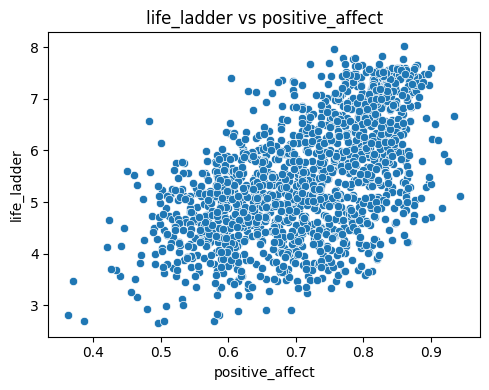

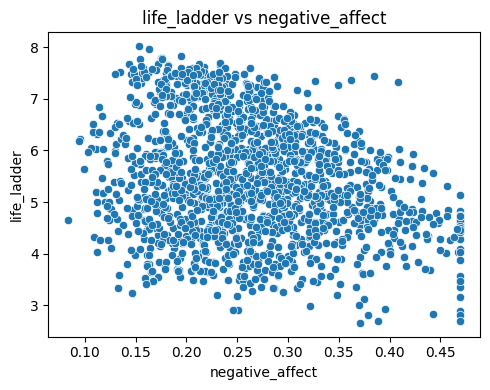

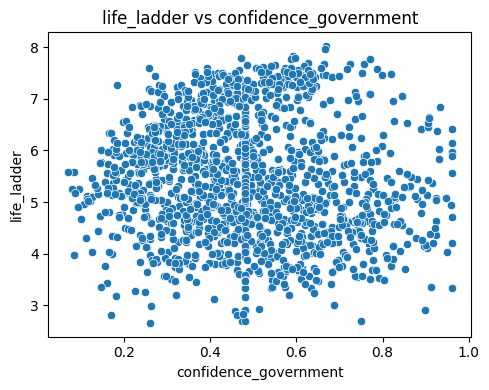

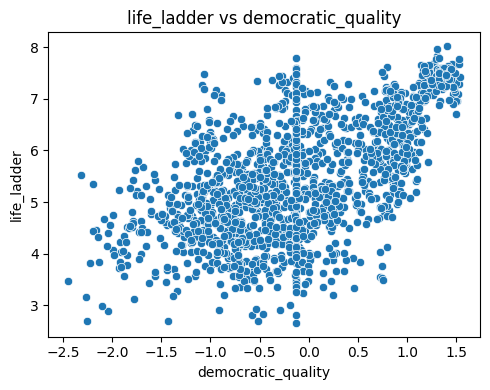

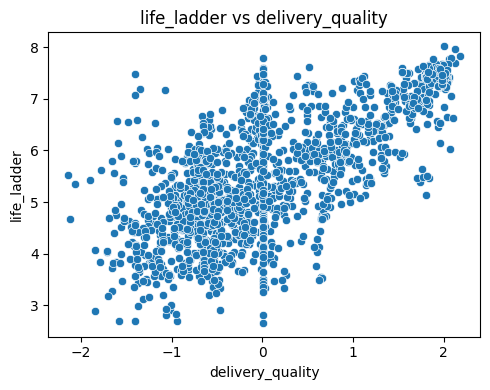

In [16]:
#BY THEODORA YAKOUB - ME!

numeric = df.select_dtypes(include='number').columns
for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

df.rename(columns={
    'Life Ladder': 'life_ladder',
    'Log GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy at birth': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom_of_choice',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perceptions_of_corruption',
    'Positive affect': 'positive_affect',
    'Negative affect': 'negative_affect',
    'Confidence in national government': 'confidence_government',
    'Democratic Quality': 'democratic_quality',
    'Delivery Quality': 'delivery_quality'
}, inplace=True)

keep = [
    'log_gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_of_choice',
    'generosity',
    'perceptions_of_corruption',
    'positive_affect',
    'negative_affect',
    'confidence_government',
    'democratic_quality',
    'delivery_quality',
    'life_ladder'
]
df = df[keep]

import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe().T)

df.hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient='h')
plt.title("Boxplots of All Numeric Features")
plt.show()

corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

features = [c for c in df.columns if c != 'life_ladder']
for col in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(data=df, x=col, y='life_ladder')
    plt.title(f"life_ladder vs {col}")
    plt.tight_layout()
    plt.show()


<Double click this Markdown cell to make it editable, and record your answers here.>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [17]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [18]:
# This part is by Zerylene
df.head(10)# YOUR CODE HERE

,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_of_choice,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_government,democratic_quality,delivery_quality,life_ladder
0,7.168690,0.518340,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,3.723590
1,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,4.401778
2,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,4.758381
3,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,3.831719
4,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,3.782938
5,7.503376,0.518340,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,3.572100
6,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,3.130896
7,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,3.982855
8,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,4.220169
9,7.460144,0.518340,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,-0.126617,0.004947,2.661718


In [20]:
# This part is by Zerylene
df.columns

Index(['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_of_choice', 'generosity', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'confidence_government',
       'democratic_quality', 'delivery_quality', 'life_ladder'],
      dtype='object')

In [21]:
# This part is by Zerylene
# create datasets 
X = df.drop(columns = 'life_ladder', axis = 1)
y = df['life_ladder']


In [22]:
# This part is by Zerylene
# split data into training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)


In [23]:
# This part is by Zerylene
# scale data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [24]:

# This part is by Zerylene
# fit training data and evaluate
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mean_abs_err = mean_absolute_error(y_test, y_pred_lr)
mean_sqr_err = mean_squared_error(y_test, y_pred_lr, squared = False)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression:\n")
print(f"Mean Absolute Error: {mean_abs_err}\n")
print(f"Mean Squared Error: {mean_sqr_err}\n")
print(f"R2: {r2}")


Linear Regression:

Mean Absolute Error: 0.42998784679656005

Mean Squared Error: 0.5525226759279903

R2: 0.7603528352997029


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# This part is by Zerylene
# model selection
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_absolute_error')

cv_scores2 = -1 * cv_scores

print(f"Mean Absolute Error Scores with Cross-Validation: {cv_scores2}\n")
print("Mean Absolute Error Scores with Cross-Validation Mean:", cv_scores2.mean())


Mean Absolute Error Scores with Cross-Validation: [0.44392585 0.41390885 0.44313426 0.44059185 0.3631321 ]

Mean Absolute Error Scores with Cross-Validation Mean: 0.42093858157559455
